# Preguntas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import seaborn as sns

### ¿Cuanto importamos de todo (FOB, CIF, CANT_BUL1 ) por mes (enero a diciembre) y por año?

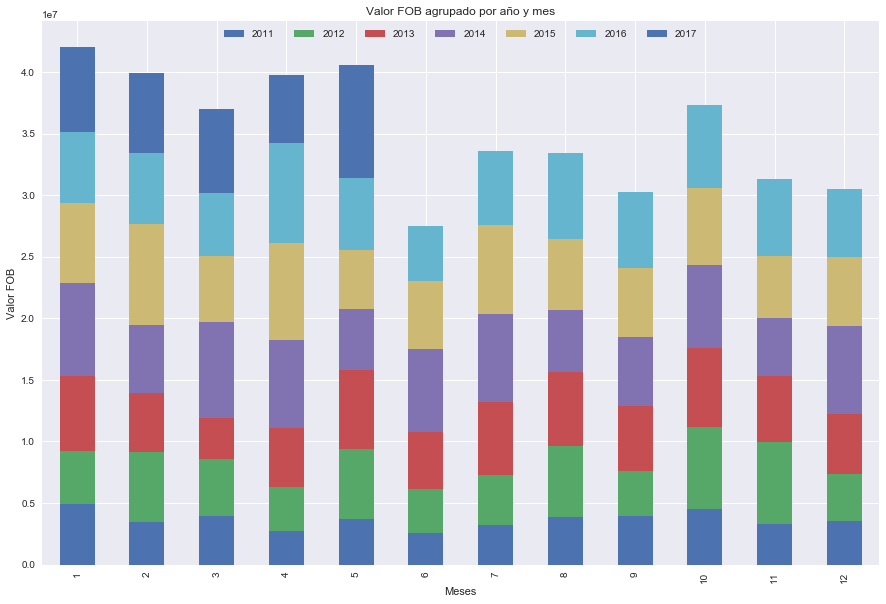

              FOB                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      4888064.52  4353771.09  6056777.17  7593420.97  6435721.54  5818110.82  6896279.64
2      3450575.52  5703834.57  4767096.52  5537482.79  8176762.76  5772075.39  6507211.18
3      3911041.20  4685263.50  3343083.91  7750286.29  5394308.64  5111160.93  6822647.56
4      2690670.68  3639448.90  4745804.12  7172800.94  7836499.29  8119641.77  5587168.40
5      3697685.28  5701992.48  6404855.68  4969624.94  4777626.95  5844976.14  9149954.24
6      2561076.61  3541822.71  4640203.94  6730891.89  5580839.37  4419497.19         NaN
7      3247977.19  4042974.55  5890539.64  7138703.79  7247801.56  6030621.24         NaN
8      3854440.07  5809325.56  5969979.44  5024861.50  5762165.54  6965501.99         NaN
9      393

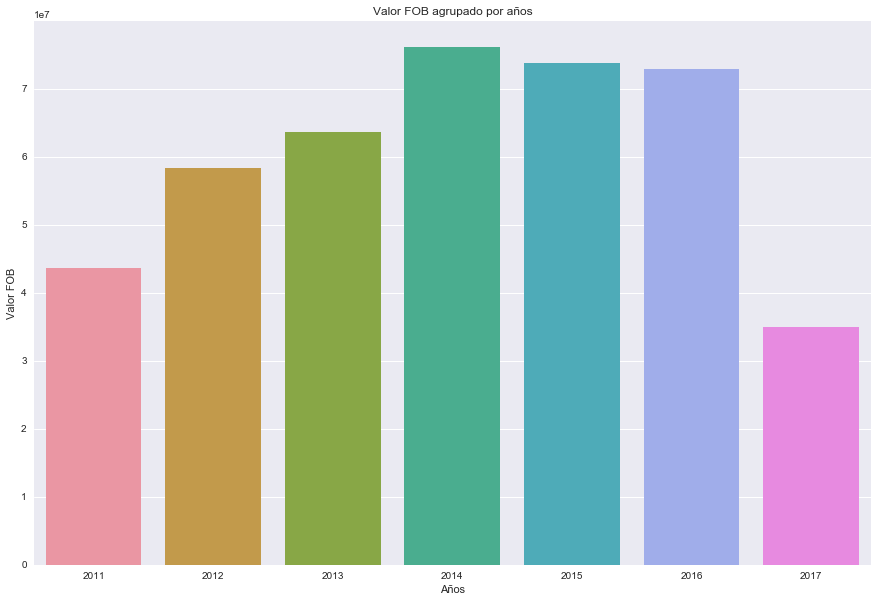

     YEAR
FOB  2011    4.359978e+07
     2012    5.831186e+07
     2013    6.370029e+07
     2014    7.612015e+07
     2015    7.372573e+07
     2016    7.284431e+07
     2017    3.496326e+07


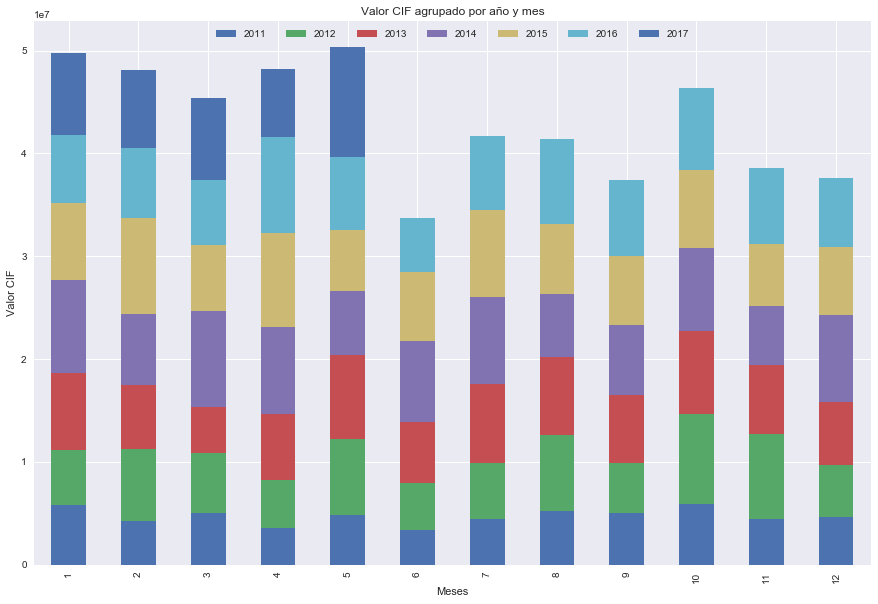

              CIF                                                                         
YEAR         2011        2012        2013        2014        2015        2016         2017
MONTH                                                                                     
1      5788826.23  5390142.53  7425242.24  9086683.71  7446918.24  6682989.51   7906739.88
2      4258901.06  7023524.47  6151110.28  6889484.24  9367644.79  6822076.78   7599280.72
3      5002774.74  5853021.06  4487453.87  9338368.71  6442432.00  6316859.95   7971047.63
4      3527406.52  4657493.18  6442853.00  8465647.26  9137682.21  9399125.26   6573287.11
5      4849164.79  7334784.70  8166651.89  6298692.18  5856676.69  7089862.08  10760985.12
6      3334255.05  4589594.77  5937640.67  7892044.24  6668873.34  5297046.20          NaN
7      4409952.99  5463302.99  7711901.70  8443542.90  8456135.51  7185575.28          NaN
8      5193046.69  7447225.82  7553920.69  6089394.61  6811595.54  8277305.19          NaN

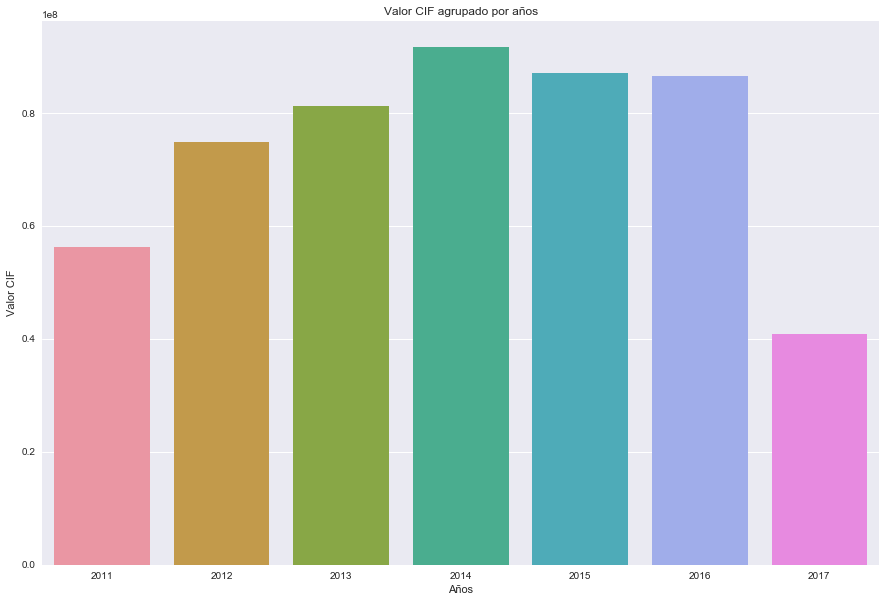

     YEAR
CIF  2011    56298948.70
     2012    74800266.45
     2013    81241189.81
     2014    91677274.02
     2015    87119961.23
     2016    86529224.41
     2017    40811340.46


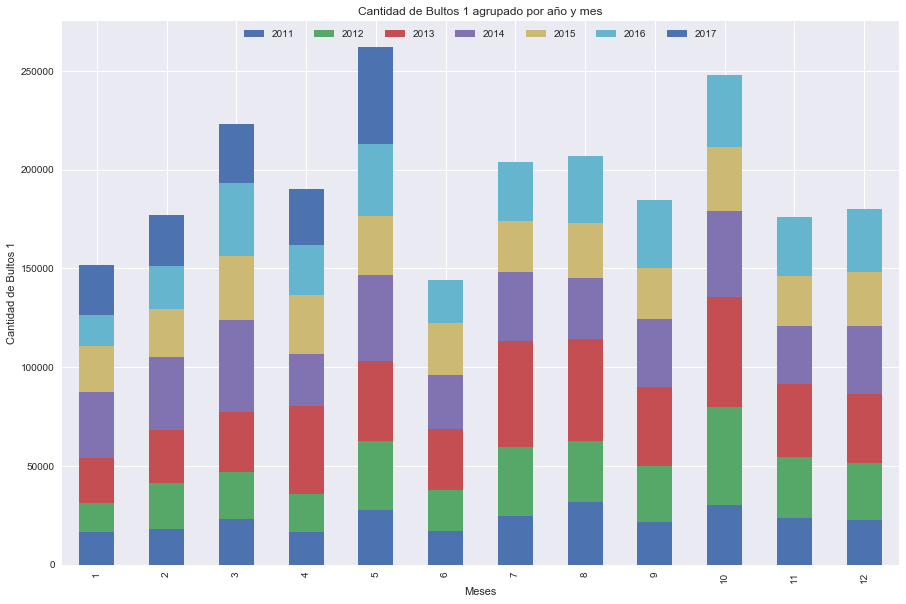

      CANT_BUL1                                                      
YEAR       2011     2012     2013     2014     2015     2016     2017
MONTH                                                                
1       16320.0  14686.0  23087.0  33507.0  22815.0  15766.0  25712.0
2       18209.0  22949.0  26909.0  37014.0  24346.0  21530.0  25824.0
3       22912.0  23923.0  30293.0  46770.0  32083.0  37127.0  30071.0
4       16247.0  19517.0  44604.0  25993.0  29927.0  25747.0  27854.0
5       27814.0  34508.0  40764.0  43291.0  29998.0  36498.0  49239.0
6       17102.0  20416.0  31104.0  27139.0  26510.0  21916.0      NaN
7       24776.0  34802.0  53779.0  34519.0  25938.0  30067.0      NaN
8       31544.0  30946.0  51450.0  30988.0  28184.0  33666.0      NaN
9       21750.0  28242.0  40079.0  34324.0  25931.0  34229.0      NaN
10      30238.0  49404.0  55785.0  43703.0  32194.0  36306.0      NaN
11      23379.0  31284.0  36760.0  29468.0  25314.0  29635.0      NaN
12      22453.0  288

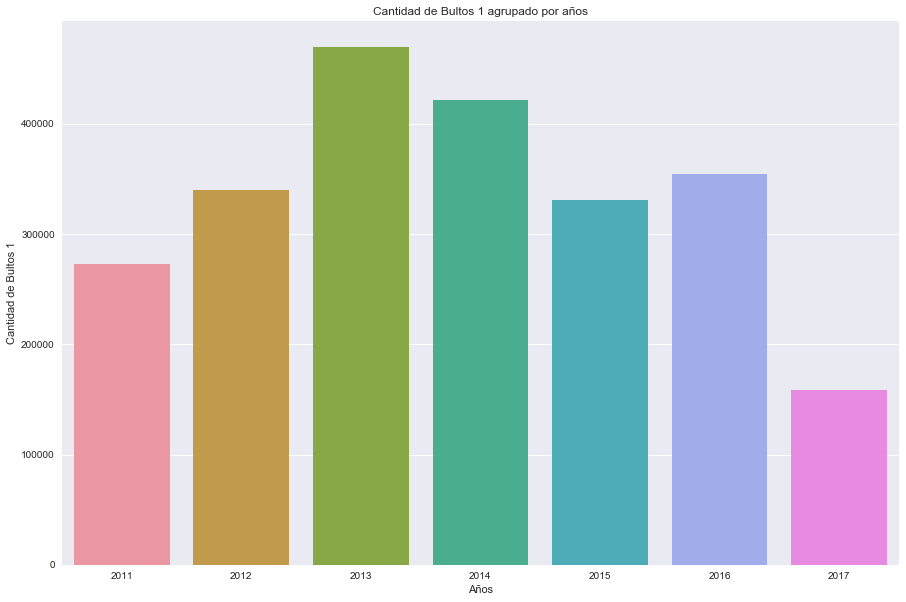

           YEAR
CANT_BUL1  2011    272744
           2012    339494
           2013    469559
           2014    421354
           2015    330575
           2016    354128
           2017    158700


In [44]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["YEAR", "MONTH", "FOB", "CIF", "CANT_BUL1"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 

for element,text in [("FOB",  "Valor FOB"),
                     ("CIF", "Valor CIF"),
                     ("CANT_BUL1", "Cantidad de Bultos 1")]:
    
    new_data = data[["YEAR", "MONTH", element]]
    new_data_grouper = new_data.groupby(['MONTH','YEAR']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10))

    plot.set_title(text + " agrupado por año y mes")
    plot.set_xlabel("Meses")
    plot.set_ylabel(text)
    plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"], loc=9,ncol=7)

    plt.show()
    print(new_data_grouper.unstack().to_string())
    
    plt.figure(figsize=(15, 10))
    sns.despine(left=True, bottom=True)
    
    new_data = data[["YEAR", element]]
    new_data_grouper = new_data.groupby('YEAR').sum()

    barplot = sns.barplot(x=new_data_grouper.index, y=new_data_grouper[element])
    
    barplot.set(xlabel='Años', ylabel=text)
    barplot.set_title(text + " agrupado por años")

    plt.show()
    print(new_data_grouper.unstack().to_string())


### ¿Cuanto exportamos de todo (TOTALBULTOS, PESOBRUTOTOTAL, TOTALVALORFOB) por mes (enero a diciembre) y por año?


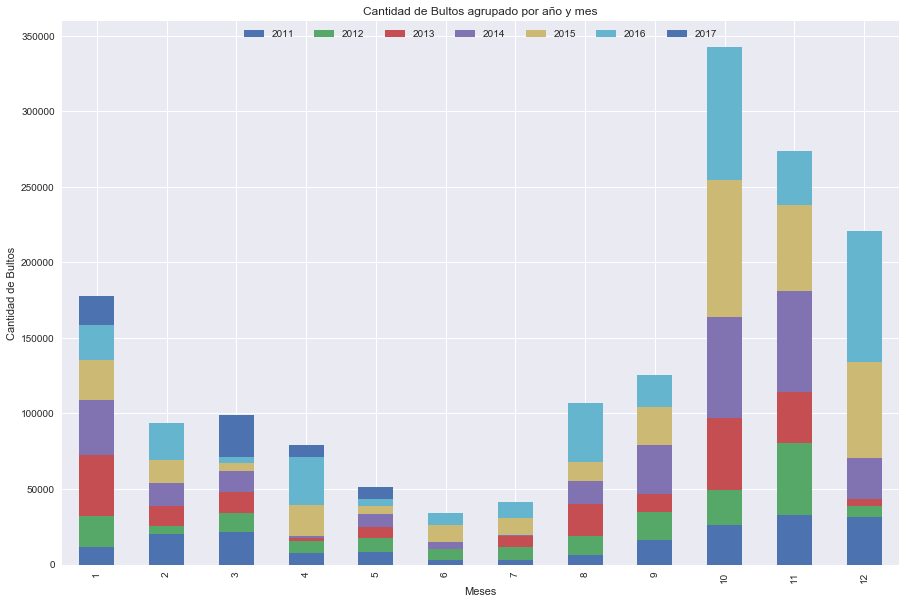

      TOTALBULTOS                                                      
YEAR         2011     2012     2013     2014     2015     2016     2017
MONTH                                                                  
1         11814.0  20144.0  40831.0  35873.0  26504.0  23262.0  19081.0
2         19899.0   5496.0  13537.0  15069.0  15474.0  24127.0    112.0
3         21280.0  12575.0  14088.0  13803.0   5732.0   3516.0  27999.0
4          7910.0   7601.0   1911.0   1165.0  20612.0  32188.0   7589.0
5          8519.0   8861.0   7470.0   8406.0   5714.0   4694.0   7589.0
6          2708.0   7293.0    495.0   4537.0  10942.0   8476.0      NaN
7          2947.0   8516.0   7616.0    696.0  10932.0  10816.0      NaN
8          6566.0  12112.0  21223.0  15103.0  12879.0  38896.0      NaN
9         16106.0  18430.0  11983.0  32872.0  25069.0  21112.0      NaN
10        25909.0  23152.0  48231.0  66295.0  90783.0  88324.0      NaN
11        33009.0  47403.0  33910.0  66436.0  57448.0  35754.0  

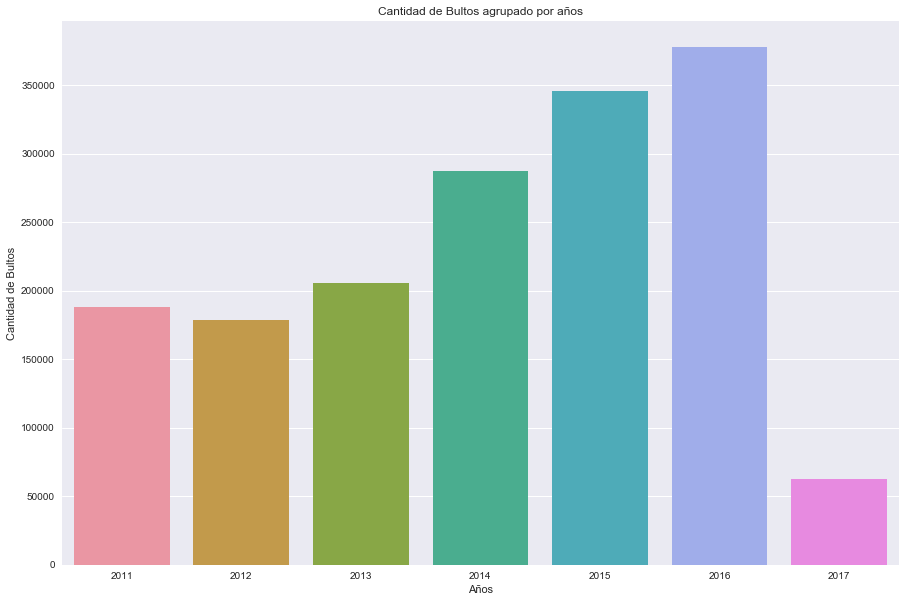

             YEAR
TOTALBULTOS  2011    188346
             2012    178525
             2013    205771
             2014    287442
             2015    346058
             2016    377921
             2017     62370


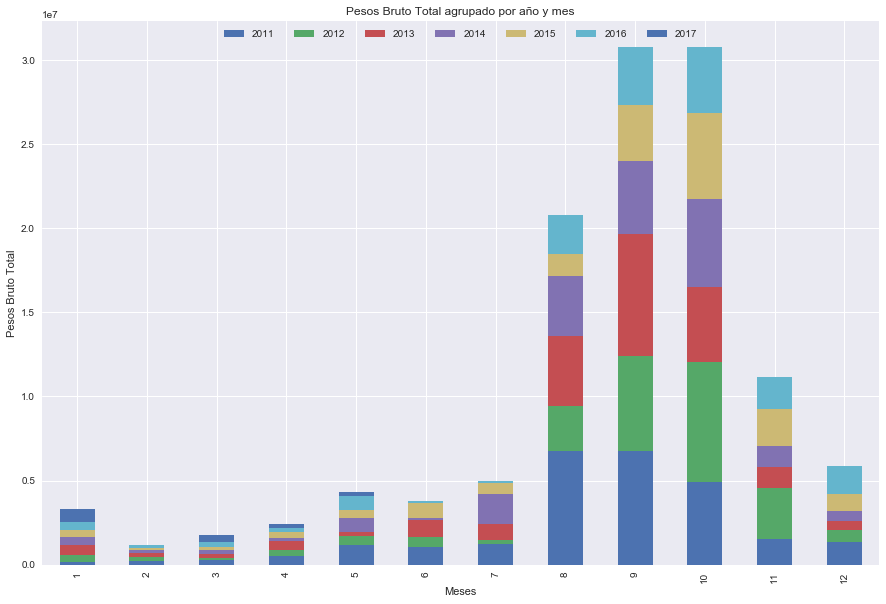

      PESOBRUTOTOTAL                                                                       
YEAR            2011        2012        2013        2014        2015        2016       2017
MONTH                                                                                      
1          137719.00   433791.04   567523.00   475023.84   434040.95   458257.50  771047.50
2          232860.76   243086.00   231484.55   148196.24   108552.00   180932.00   19450.00
3          242495.86   131589.00   268899.00   209502.42   166545.10   332630.00  387888.70
4          499357.72   389936.38   509122.38   210827.40   302592.96   259654.00  234981.99
5         1146257.04   526462.76   259478.54   857770.42   434137.95   850618.60  234981.99
6         1031361.02   628756.15   994887.20   122810.62   877941.00   138261.00        NaN
7         1233315.56   250821.24   951352.75  1738693.44   652876.48   139369.00        NaN
8         6769547.60  2662778.62  4136431.00  3615150.56  1308845.00  2290429.55

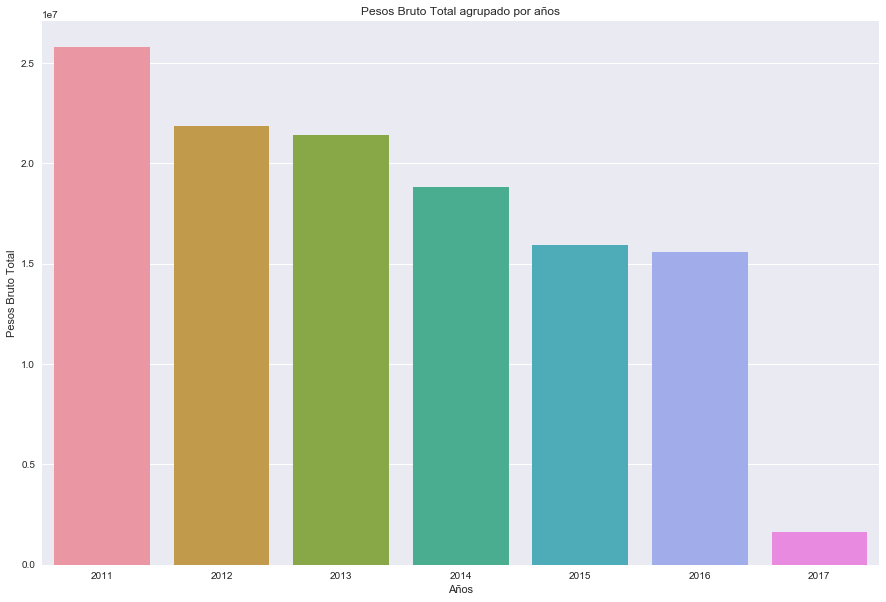

                YEAR
PESOBRUTOTOTAL  2011    25791005.12
                2012    21849228.26
                2013    21424588.64
                2014    18810986.01
                2015    15923014.51
                2016    15605381.99
                2017     1648350.18


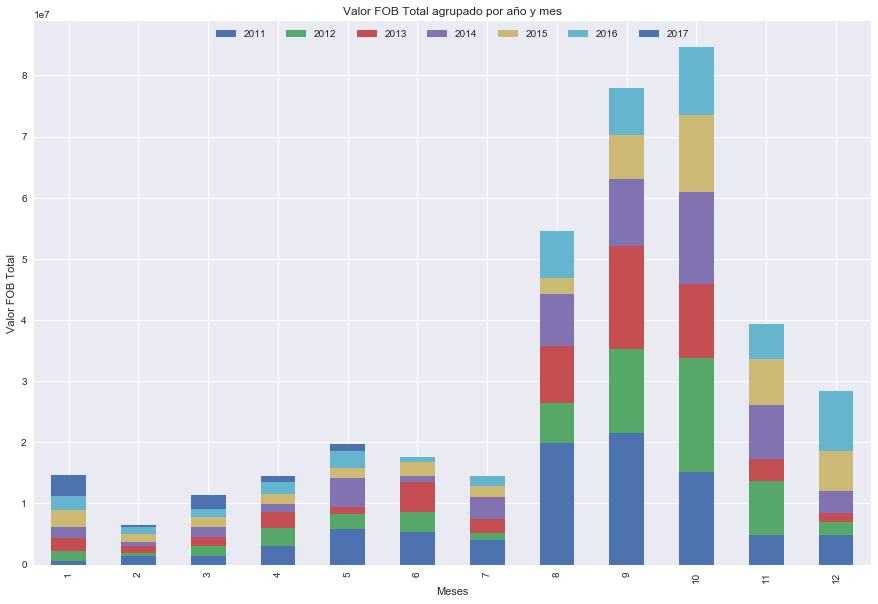

      TOTALVALORFOB                                                                             
YEAR           2011         2012         2013         2014         2015         2016        2017
MONTH                                                                                           
1         633771.50   1598329.59   2107086.84   1749256.18   2826904.04   2332053.99  3390900.34
2        1337215.21    530419.08   1121136.62    754229.17   1200749.60   1253094.90   235976.51
3        1408616.86   1603930.50   1505338.47   1674661.66   1550145.06   1276412.12  2349566.16
4        3044967.48   2936756.11   2630774.97   1251567.52   1679910.47   1987707.48  1020218.33
5        5889633.49   2340735.05   1260529.97   4584001.56   1674119.22   2867808.67  1020218.33
6        5398158.40   3273384.70   4850286.89    971998.41   2226285.47    820890.13         NaN
7        4088699.59   1113580.63   2223747.27   3578765.44   1888158.65   1599692.48         NaN
8       19864016.86   6564086.

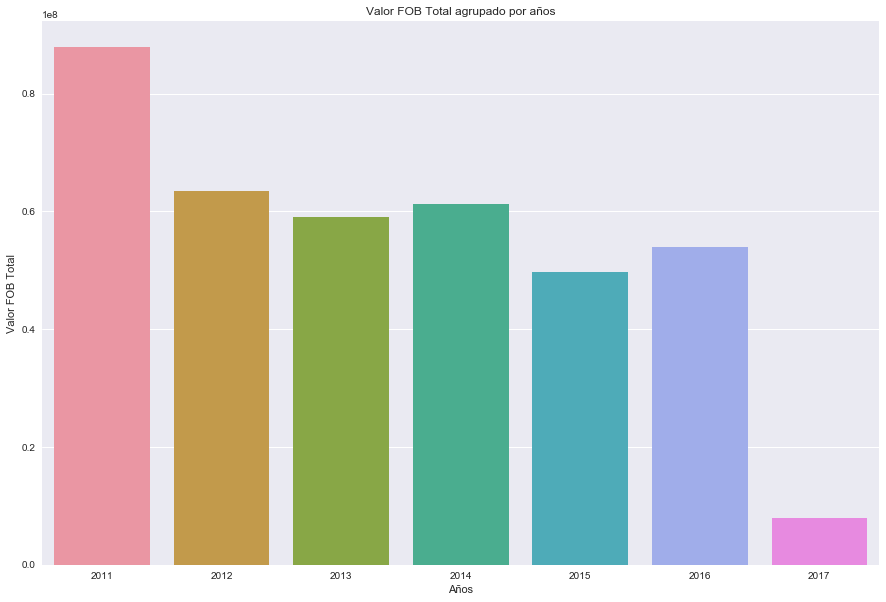

               YEAR
TOTALVALORFOB  2011    87902763.20
               2012    63489772.60
               2013    59059207.23
               2014    61312003.60
               2015    49745925.77
               2016    53984026.11
               2017     8016879.67


In [45]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["YEAR", "MONTH", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 

for element,text in [("TOTALBULTOS",  "Cantidad de Bultos"),
                     ("PESOBRUTOTOTAL", "Pesos Bruto Total"),
                     ("TOTALVALORFOB", "Valor FOB Total")]:
    
    new_data = data[["YEAR", "MONTH", element]]
    new_data_grouper = new_data.groupby(['MONTH','YEAR']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10))

    plot.set_title(text + " agrupado por año y mes")
    plot.set_xlabel("Meses")
    plot.set_ylabel(text)
    plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"], loc=9,ncol=7)

    plt.show()
    print(new_data_grouper.unstack().to_string())
    
    plt.figure(figsize=(15, 10))
    sns.despine(left=True, bottom=True)
    
    new_data = data[["YEAR", element]]
    new_data_grouper = new_data.groupby('YEAR').sum()

    barplot = sns.barplot(x=new_data_grouper.index, y=new_data_grouper[element])
    
    barplot.set(xlabel='Años', ylabel=text)
    barplot.set_title(text + " agrupado por años")

    plt.show()
    print(new_data_grouper.unstack().to_string())
    

### ¿Cuanto importamos de A, B, C, D y E (de cada grupo FOB, CIF, CANT_BUL1) por mes (enero a diciembre) y por año?

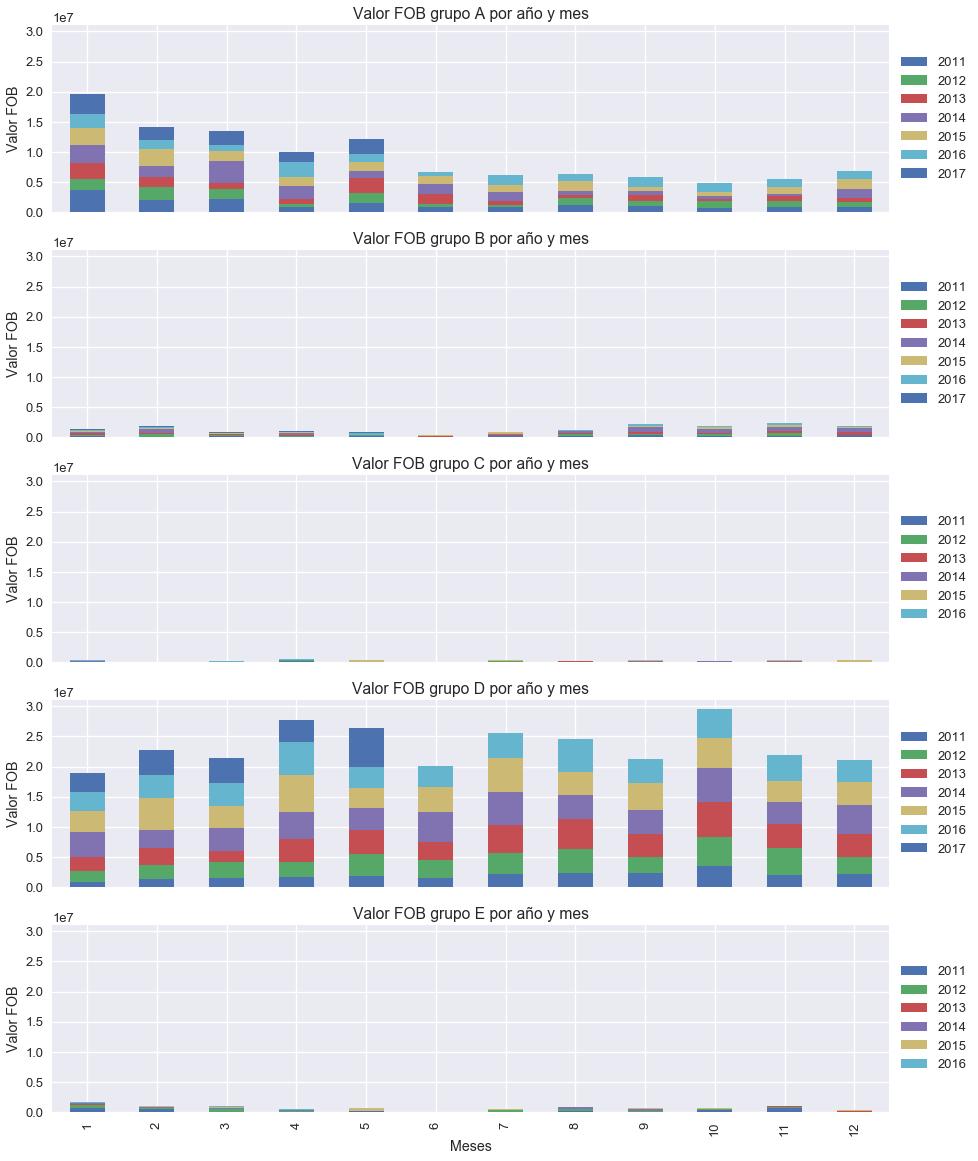

----- Valor FOB del grupo A ------

              FOB                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      3788916.57  1679208.51  2807393.45  2942646.71  2699949.62  2336248.05  3421637.99
2      2058509.54  2165443.14  1667329.69  1801379.71  2778893.36  1519164.39  2152828.53
3      2284781.65  1667453.22   862736.50  3668023.88  1713232.51   917408.09  2362549.93
4       904995.82   575392.42   735908.98  2242917.44  1385293.39  2520285.14  1692921.28
5      1613874.69  1667000.83  2366811.69  1187937.90  1462795.49  1448695.97  2422877.84
6       870743.95   538602.39  1608818.44  1648144.65  1301379.88   798477.27         NaN
7       889568.08   330055.73   694285.48  1547420.51  1112758.30  1692204.48         NaN
8      1205073.00  1170286.96   539439.83   682972.97  1662705.3

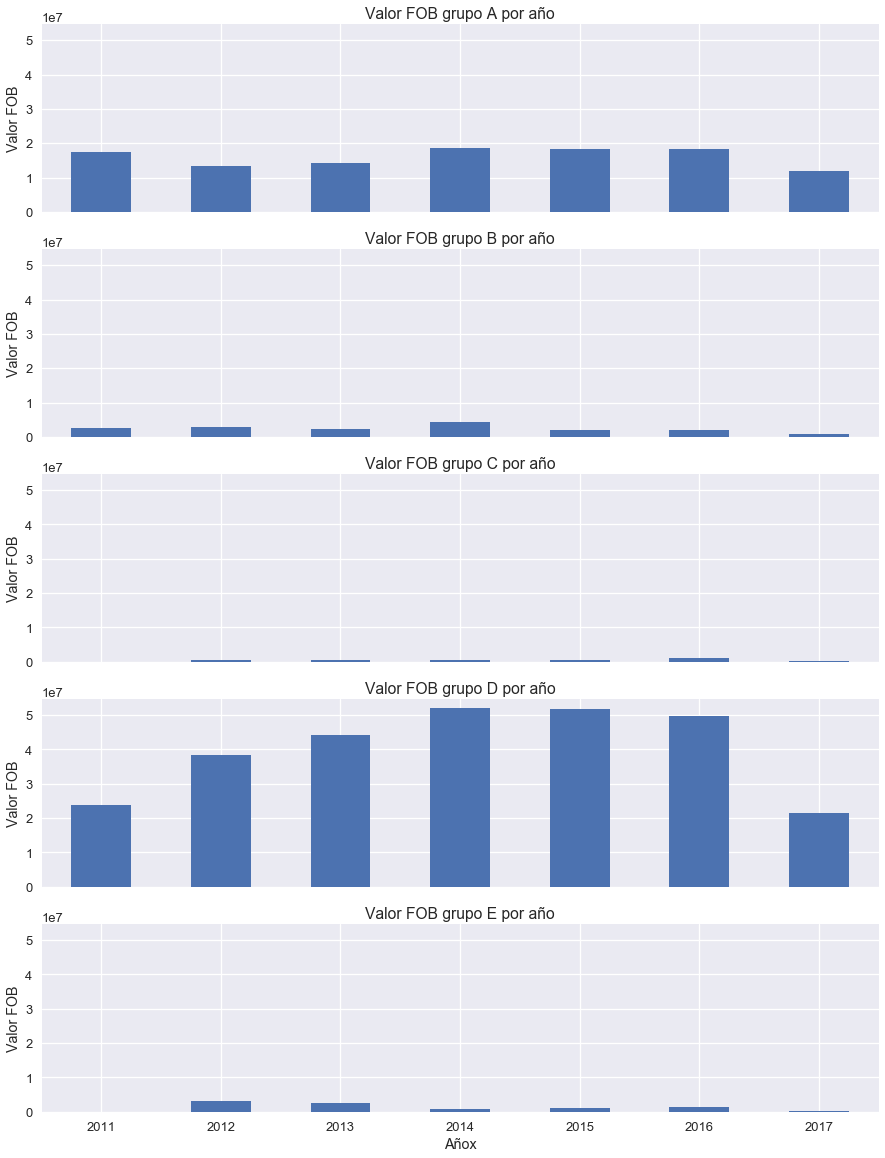

----- Valor FOB del grupo A ------

     YEAR
FOB  2011    17309724.31
     2012    13469915.13
     2013    14220578.39
     2014    18663180.65
     2015    18205923.90
     2016    18341156.64
     2017    12052815.57

----- Valor FOB del grupo B ------

     YEAR
FOB  2011    2566912.47
     2012    2882652.77
     2013    2263829.19
     2014    4376466.61
     2015    2075668.56
     2016    2036521.24
     2017     698323.90

----- Valor FOB del grupo C ------

     YEAR
FOB  2011          0.00
     2012     593060.81
     2013     418141.30
     2014     456761.39
     2015     577554.59
     2016    1166512.70
     2017     372551.85

----- Valor FOB del grupo D ------

     YEAR
FOB  2011    2.372314e+07
     2012    3.824304e+07
     2013    4.428675e+07
     2014    5.197818e+07
     2015    5.189724e+07
     2016    4.985100e+07
     2017    2.150890e+07

----- Valor FOB del grupo E ------

     YEAR
FOB  2011          0.00
     2012    3123187.16
     2013    2510994.75
 

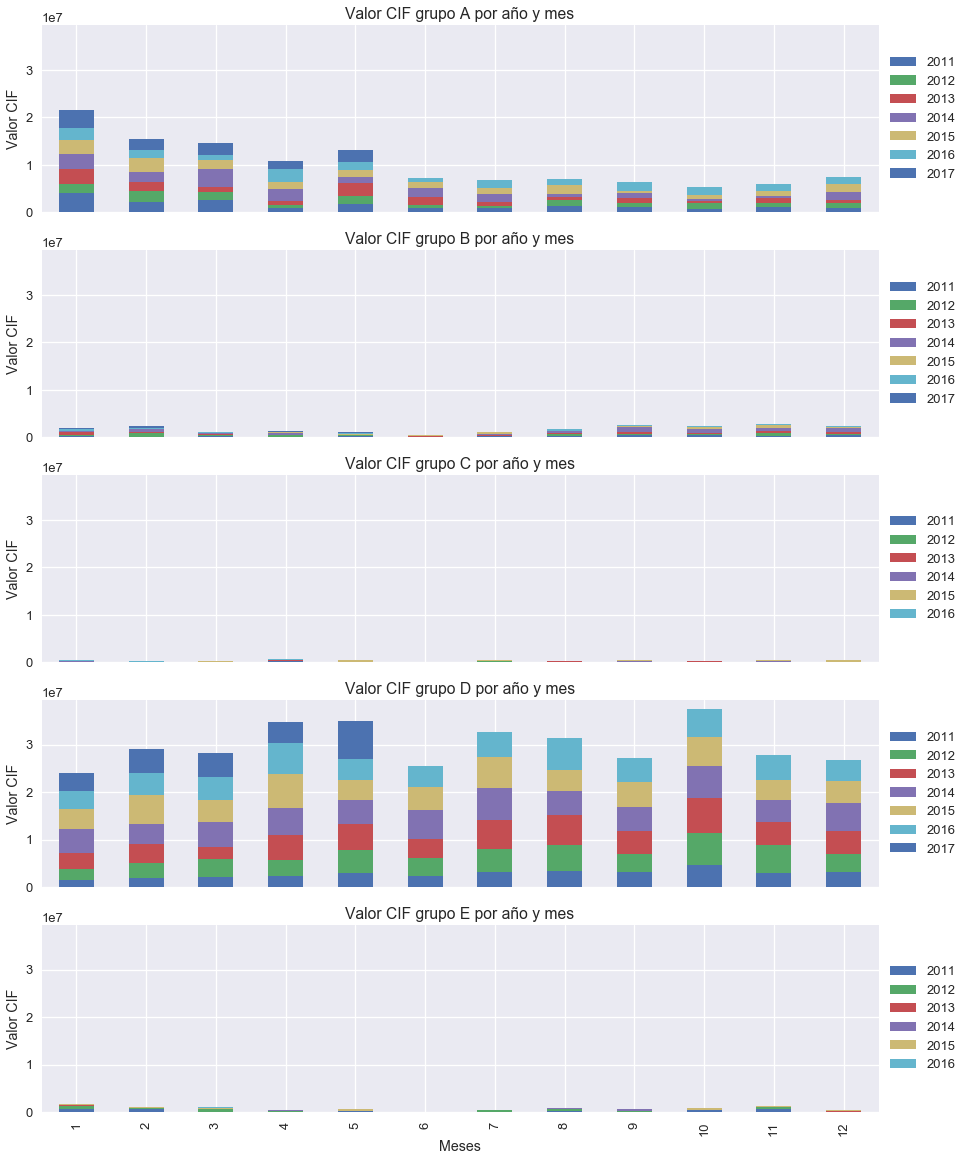

----- Valor CIF del grupo A ------

              CIF                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      4107453.09  1934042.24  3073409.83  3259341.56  2939880.89  2534217.88  3635775.63
2      2231282.54  2349672.44  1841579.62  2010562.21  3076777.19  1674316.83  2314284.72
3      2529171.18  1776088.99   965431.18  3908926.47  1823045.84  1015984.86  2540196.38
4       998374.99   634156.90   813465.03  2435317.40  1477690.21  2703036.47  1794480.96
5      1747558.98  1804068.28  2592299.98  1291645.46  1557694.18  1542132.69  2546060.25
6       939026.04   593733.59  1770237.12  1781739.19  1397195.33   869623.20         NaN
7      1008977.46   381110.18   768316.01  1687492.92  1201164.36  1794196.97         NaN
8      1325674.37  1301521.08   596656.27   755487.28  1787333.1

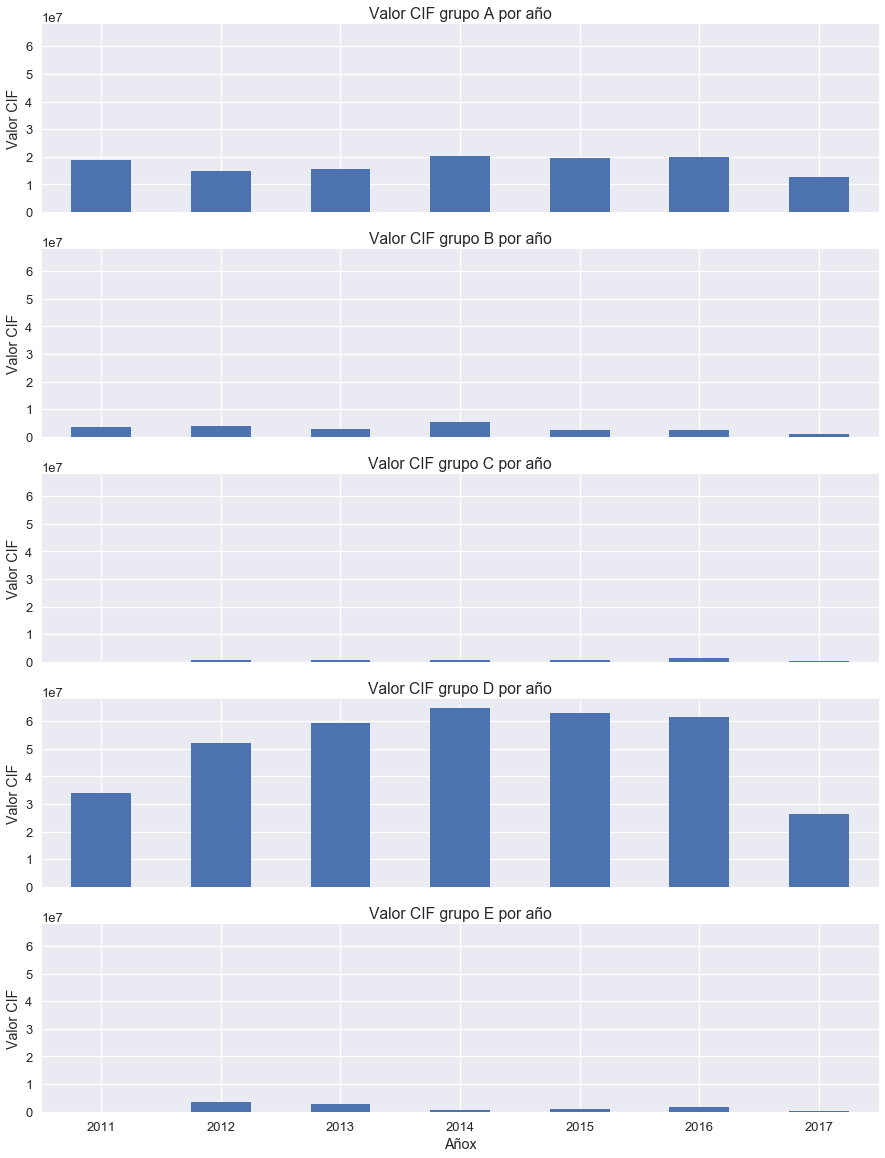

----- Valor CIF del grupo A ------

     YEAR
CIF  2011    18909243.40
     2012    14824201.89
     2013    15635266.45
     2014    20389765.19
     2015    19646835.20
     2016    19736597.77
     2017    12830797.94

----- Valor CIF del grupo B ------

     YEAR
CIF  2011    3489740.30
     2012    3795678.43
     2013    3012233.85
     2014    5265446.49
     2015    2664202.53
     2016    2431777.31
     2017     898469.48

----- Valor CIF del grupo C ------

     YEAR
CIF  2011          0.00
     2012     733279.54
     2013     552458.17
     2014     634736.20
     2015     749487.16
     2016    1462245.95
     2017     468637.10

----- Valor CIF del grupo D ------

     YEAR
CIF  2011    33899965.00
     2012    52058971.07
     2013    59264660.17
     2014    64656404.18
     2015    62987933.19
     2016    61313283.32
     2017    26247041.07

----- Valor CIF del grupo E ------

     YEAR
CIF  2011          0.00
     2012    3388135.52
     2013    2776571.17
     201

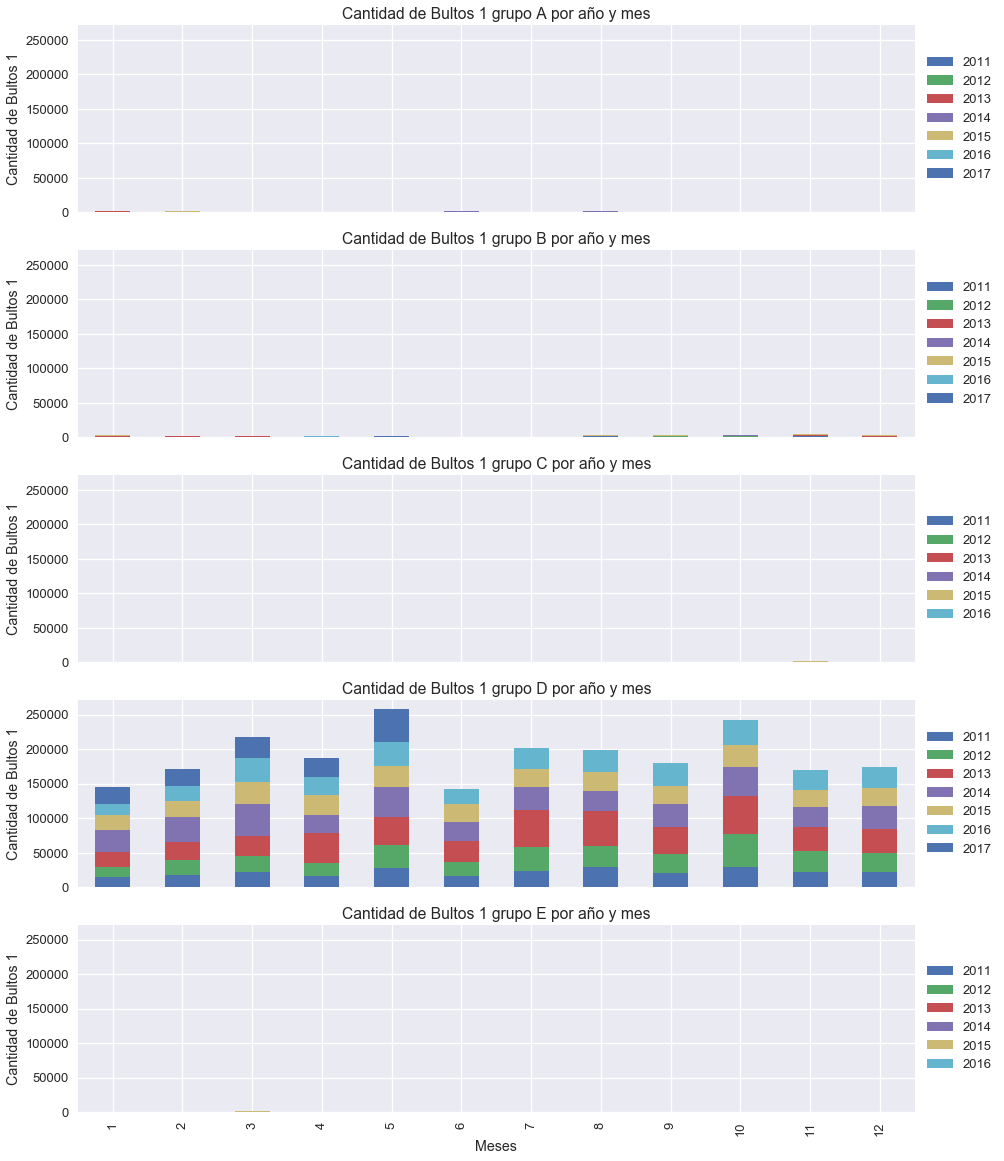

----- Cantidad de Bultos 1 del grupo A ------

      CANT_BUL1                                          
YEAR       2011   2012   2013   2014   2015   2016   2017
MONTH                                                    
1         253.0  464.0  753.0  318.0  119.0  105.0  111.0
2         390.0  184.0   67.0  355.0  572.0   74.0   87.0
3         726.0  141.0   65.0   74.0   41.0  214.0   83.0
4         372.0  101.0   31.0  209.0   37.0   81.0   43.0
5         177.0   49.0   67.0   34.0   38.0   93.0   60.0
6         281.0  251.0  585.0  322.0   47.0   36.0    NaN
7         501.0   23.0   29.0   62.0   38.0   39.0    NaN
8         430.0  546.0  394.0  742.0  388.0   51.0    NaN
9         130.0  128.0   26.0   47.0  200.0   79.0    NaN
10         21.0   41.0   46.0  104.0   53.0  110.0    NaN
11        386.0   35.0   27.0   23.0   52.0   38.0    NaN
12         25.0   23.0   19.0   94.0   70.0  141.0    NaN

----- Cantidad de Bultos 1 del grupo B ------

      CANT_BUL1                    

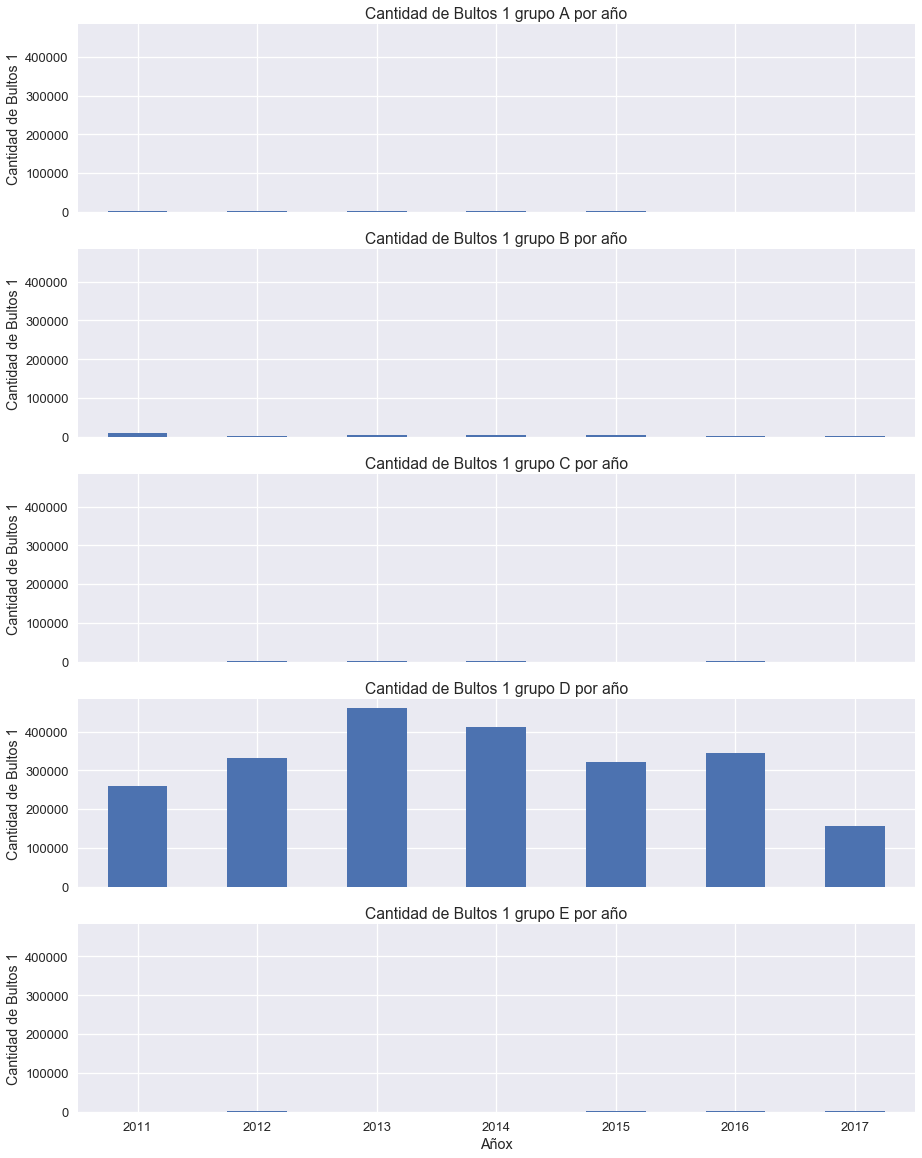

----- Cantidad de Bultos 1 del grupo A ------

           YEAR
CANT_BUL1  2011    3692
           2012    1986
           2013    2109
           2014    2384
           2015    1655
           2016    1061
           2017     384

----- Cantidad de Bultos 1 del grupo B ------

           YEAR
CANT_BUL1  2011    9004
           2012    3336
           2013    6087
           2014    4854
           2015    5135
           2016    2275
           2017    1256

----- Cantidad de Bultos 1 del grupo C ------

           YEAR
CANT_BUL1  2011       0
           2012    1450
           2013    1198
           2014    1582
           2015     549
           2016    3044
           2017     278

----- Cantidad de Bultos 1 del grupo D ------

           YEAR
CANT_BUL1  2011    260048
           2012    332190
           2013    459997
           2014    412091
           2015    322211
           2016    345822
           2017    156238

----- Cantidad de Bultos 1 del grupo E ------

           

In [132]:
# filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["YEAR", "MONTH", "FOB", "CIF", "CANT_BUL1", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 

for element,text in [("FOB",  "Valor FOB"),
                     ("CIF", "Valor CIF"),
                     ("CANT_BUL1", "Cantidad de Bultos 1")]:
    # Month
    
    fig, axes_month = plt.subplots(5, sharex=True, sharey=True)
    
    i = 0
    
    tables = []
    
    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = data[["YEAR", "MONTH", "GROUP", element]]
        new_data = new_data[new_data["GROUP"] == group]
        
        new_data_grouper = new_data.groupby(['MONTH','YEAR']).sum()

        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20))

        plot.set_title(text + " grupo " + group + " por año y mes")
        plot.set_xlabel("Meses")
        plot.set_ylabel(text)
        
        i+=1
        

        plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
        print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))

    
        
        
    # Year
    
    fig, axes_month = plt.subplots(5, sharex=True, sharey=True)
    
    i = 0
    
    tables = []
    
    
    
    for group in ["A", "B", "C", "D", "E"]:
        
        
        new_data = data[["YEAR", "GROUP", element]]
        new_data = new_data[new_data["GROUP"] == group]
        
        new_data_grouper = new_data.groupby('YEAR').sum()
        for year in range(2011, 2018):
            if year not in new_data_grouper.index:
                new_data.loc[new_data.shape[0]] = [year, group, 0]
                new_data_grouper = new_data.groupby('YEAR').sum()
                
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20))

        plot.set_title(text + " grupo " + group + " por año")
        plot.set_xlabel("Añox")
        plot.set_ylabel(text)
        plot.set_xticklabels(("2011", "2012", "2013", "2014", "2015", "2016", "2017"), rotation="horizontal")
        i+=1
                
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
        print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))
        
